# Problem - 2

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller
register_matplotlib_converters()
from time import time

In [135]:
data = pd.read_csv("EE627A_HW2_Q2.csv")

In [136]:
data.head()

,0.8512
0,-2.0698
1,0.8185
2,-1.0678
3,2.3753
4,-0.1847


In [137]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statisitc: %f' % result[0])
    print('p-value: %f' % result[1])

In [138]:
adf_test(data)

ADF Statisitc: -9.902951
p-value: 0.000000


Since p-value is less than 0.05, we can reject the null hypothesis that there is a unit root and can assume that this series is stationary.

Text(0, 0.5, 'Values')

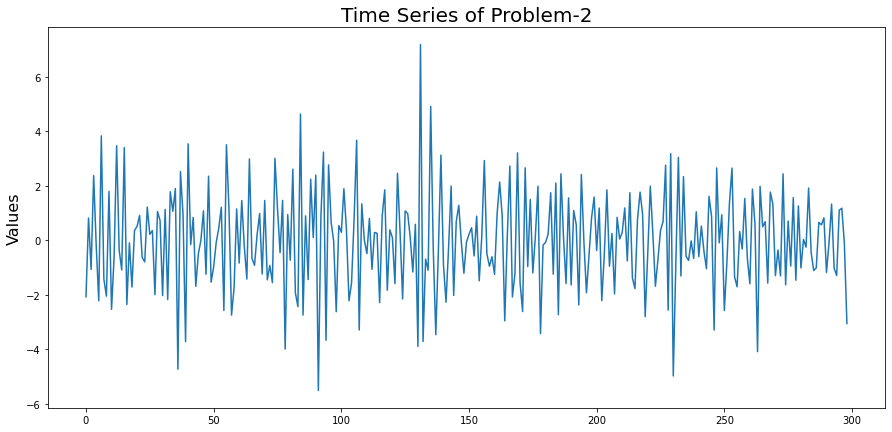

In [139]:
plt.figure(figsize=(15,7))

plt.plot(data)

plt.title('Time Series of Problem-2', fontsize=20)
plt.ylabel('Values', fontsize=16)

Just looking at the graph above, we can see the time series is stationary.

ACF

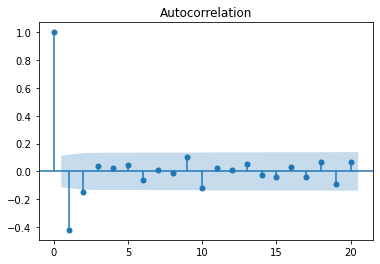

In [140]:
acf_plot = plot_acf(data, lags=20)

For an AR model, we expect the ACF to exhibit a diminishing behavior over time. We do not see that here - instead, we se a couple of strong lags and then the rest are insignificant.

For MA models, we observe the ACF plot.

PACF

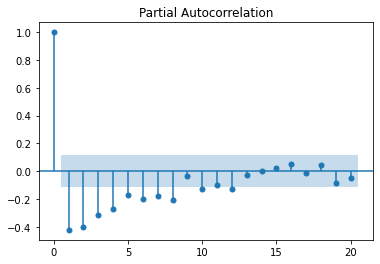

In [141]:
pacf_plot = plot_pacf(data, lags=20)

For an MA model, this is the opposite of and AR model. We would expect the PACF (and not the ACF) to exhibit a diminishing behavior over time, which is what we see here. Therefore, we are liking dealing with a moving average model.

For AR models, we observe the PACF plot.

Based on the ACF and PACF, we should start with a Moving Average model with lags 1 and 2.
We can also try an Autoregressive model with lags 1, 4, 8, and 12.

/Users/hinalpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


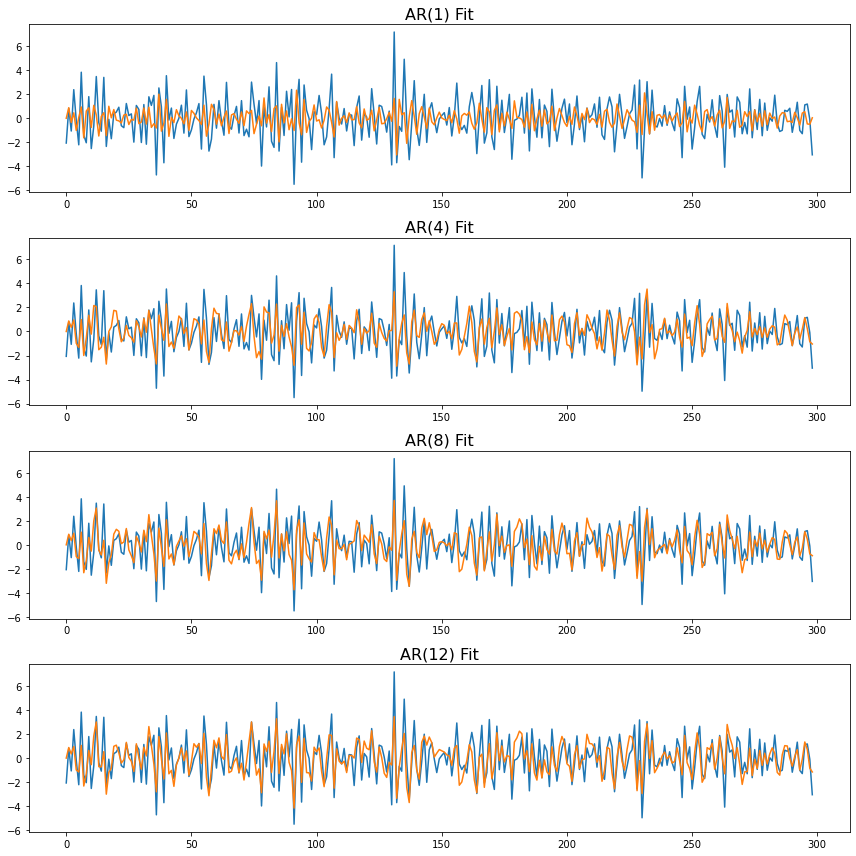

In [142]:
plt.figure(figsize=(12, 12))

ar_orders = [1, 4, 8, 12]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    # Create AR(p) model
    ar_model = ARMA(data, order=(ar_order, 0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4, 1, idx + 1)
    plt.plot(data)
    plt.plot(ar_model_fit.fittedvalues)    # fitted values are predicted values from the model
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

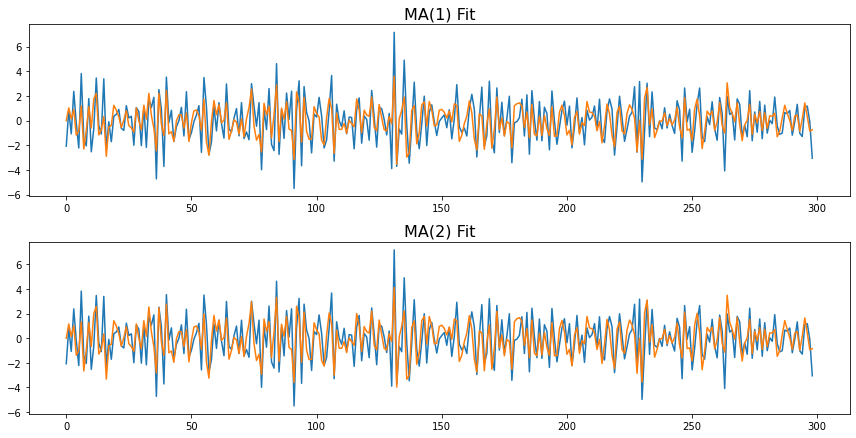

In [143]:
plt.figure(figsize=(12, 12))

ma_orders = [1, 2]
ma_fitted_model_dict = {}

for idx, ma_order in enumerate(ma_orders):
    # Create MA(q) model
    ma_model = ARMA(data, order=(0, ma_order))
    ma_model_fit = ma_model.fit()
    ma_fitted_model_dict[ma_order] = ma_model_fit
    plt.subplot(4, 1, idx + 1)
    plt.plot(data)
    plt.plot(ma_model_fit.fittedvalues)    # fitted values are predicted values from the model
    plt.title('MA(%s) Fit'%ma_order, fontsize=16)

plt.tight_layout()

/Users/hinalpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


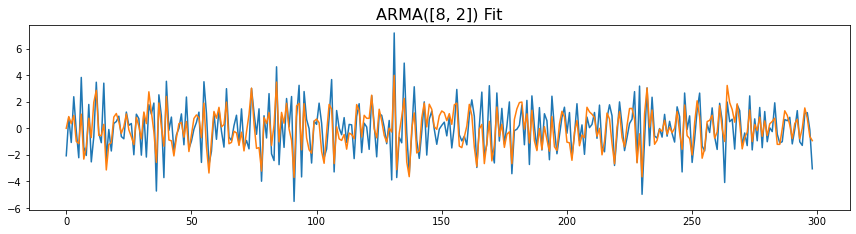

In [144]:
plt.figure(figsize=(12, 12))
arma_order = [8, 2]

# Create ARMA(p,q) model
arma_model = ARMA(data, order=(arma_order[0], arma_order[1]))
arma_model_fit = arma_model.fit()
plt.subplot(4, 1, 1)
plt.plot(data)
plt.plot(arma_model_fit.fittedvalues)    # fitted values are predicted values from the model
plt.title('ARMA(%s) Fit'%arma_order, fontsize=16)

plt.tight_layout()


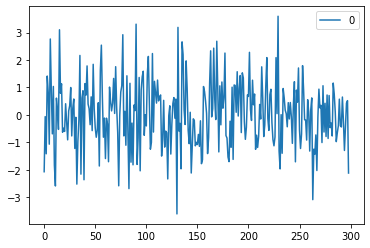

In [145]:
arma = pd.DataFrame(arma_model_fit.resid)
arma.plot()
plt.show()

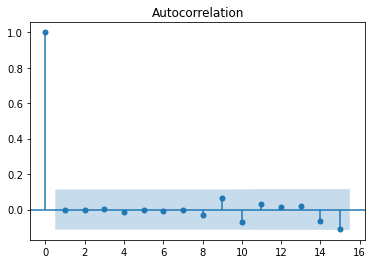

In [146]:
acf_plot = plot_acf(arma, lags=15)

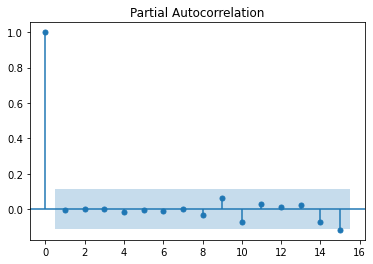

In [147]:
pacf_plot = plot_pacf(arma, lags=15)

We can see from the ACF and PACF plots above that all the values (except for 15) are around zero, which indicates that this is a pretty good model.

In [148]:
# Summary of model
# print(ar_model_fit.summary())
# print(ma_model_fit.summary())
# print(arma_model_fit.summary())

The above lines produce tables that show a good summary, including data on the importance of each lag chosen to be included in the model. Of note, you want to look at the P>|z| column. Any lags with a value here less than .05 we can consider significant. Any lags over 0.05 are not helping and therefore can be excluded.

AIC and BIC test
Each model has:

l = a log likelihood (how strong model is a fitting the data)
k = a number of parameters (order of model plus 1 for constant)
n = a number of samples used for fitting (for bic)

AIC = 2k - 2l

We want model with lowest AIC via higher log likelihood or less parameters.

BIC = ln(n)k - 2l

We want model with lowest BIC via higher log likelihood or less parameters or less samples used in fitting. This metric is used when comparing models with different numbers of samples.

In [149]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1155.8657264616293
AIC for AR(4): 1052.892247082635
AIC for AR(8): 1014.3860891695313
AIC for AR(12): 1004.2241095579899


In [150]:
for ma_order in ma_orders:
    print('AIC for MA(%s): %s'%(ma_order, ma_fitted_model_dict[ma_order].aic))


AIC for MA(1): 994.078121654427
AIC for MA(2): 993.2166661414136


In [151]:
print('AIC for ARMA(%s): %s'%(arma_order, arma_model_fit.aic))

AIC for ARMA([8, 2]): 986.1461905561986


Based on the results for AIC, we can say that an AR(12) model, MA(2) model, or ARMA(8,2) will be best here.

# Problem - 3

In [122]:
df = pd.read_csv('EE627A_HW2_Q3.csv',header = None)

In [123]:
df.head()

,0
0,1.0374
1,1.0372
2,1.0372
3,1.0370
4,1.0369


In [124]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statisitc: %f' % result[0])
    print('p-value: %f' % result[1])

In [125]:
perform_adf_test(data)

ADF Statisitc: -9.902951
p-value: 0.000000


Since p-value is greater than .05, we can't reject the null hypothesis and this model is not stationary.

Text(0, 0.5, 'Values')

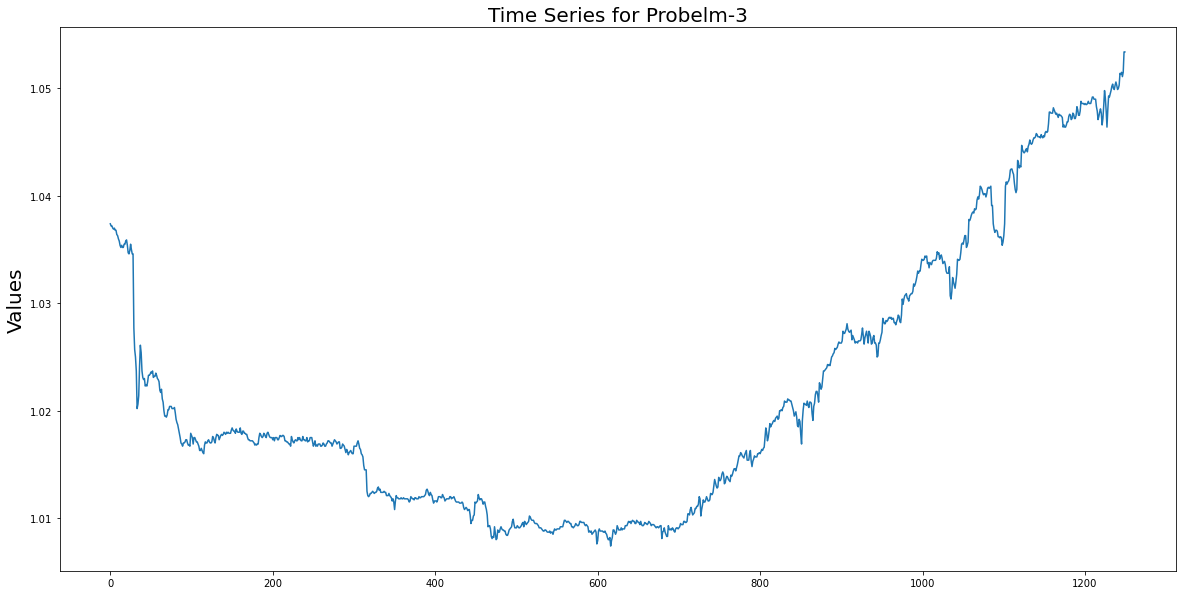

In [126]:
plt.figure(figsize=(20,10))

plt.plot(df)

plt.title('Time Series for Probelm-3', fontsize=20)
plt.ylabel('Values', fontsize=20)

Just looking at the plot we can see this model is not stationary. We should try to transform it to something that is stationary. Lets take the first difference.

In [127]:
first_diff = df.diff()[1:]

Text(0, 0.5, 'Values')

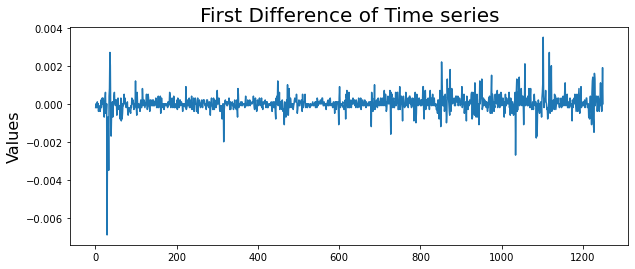

In [128]:
first_diff = df.diff()[1:]
plt.figure(figsize=(10, 4))
plt.plot(first_diff)
plt.title('First Difference of Time series', fontsize=20)
plt.ylabel('Values', fontsize=16)

his graph looks much more stationary. Let's just try the adf test to be sure.

In [129]:
perform_adf_test(first_diff)

ADF Statisitc: -9.962655
p-value: 0.000000


The p-value is now under 0.05 which means this is indeed stationary.



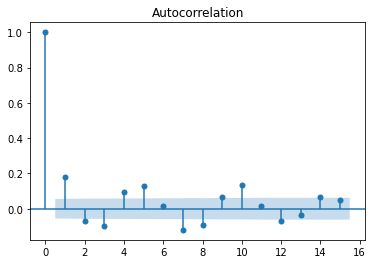

In [130]:
#ACF
acf_plot = plot_acf(first_diff, lags=15)

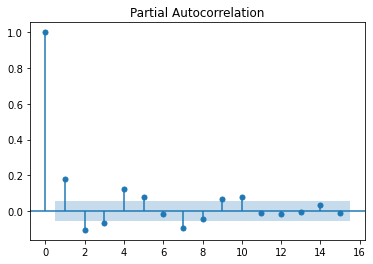

In [131]:
#PACF
pacf_plot = plot_pacf(first_diff, lags=15)

/Users/hinalpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hinalpatel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA 

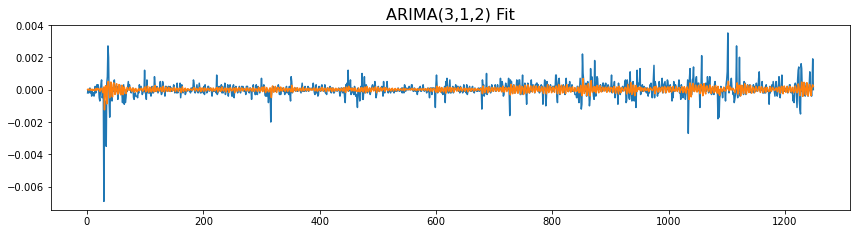

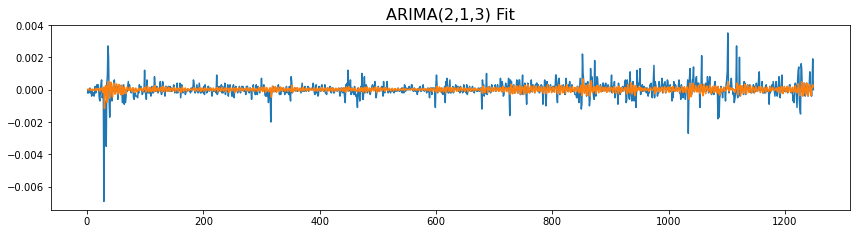

In [133]:
plt.figure(figsize=(12,12))
order_1 = (3, 1, 2)

# Create ARIMA(p,d,q) model
arima_model_1 = ARIMA(df[0], order=(order_1[0], order_1[1], order_1[2]))
arima_model_fit_1 = arima_model_1.fit()
plt.subplot(4, 1, 1)
plt.plot(first_diff)
plt.plot(arima_model_fit_1.fittedvalues)   
plt.title('ARIMA(3,1,2) Fit', fontsize=16)

plt.tight_layout()

plt.figure(figsize=(12, 12))
order_2 = (2, 1, 3)

# Create ARIMA(p,d,q) model
arima_model_2 = ARIMA(df[0], order=(order_2[0], order_2[1], order_2[2]))
arima_model_fit_2 = arima_model_2.fit()
plt.subplot(4, 1, 1)
plt.plot(first_diff)
plt.plot(arima_model_fit_2.fittedvalues)    
plt.title('ARIMA(2,1,3) Fit', fontsize=16)

plt.tight_layout()


In [90]:
# Summary of model
print(arima_model_fit_1.summary())
print(arima_model_fit_2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1249
Model:                 ARIMA(3, 1, 2)   Log Likelihood                7845.266
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sun, 13 Feb 2022   AIC                         -15676.532
Time:                        13:44:24   BIC                         -15640.621
Sample:                             1   HQIC                        -15663.032
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.257e-05   1.48e-05      0.852      0.394   -1.64e-05    4.15e-05
ar.L1.D.y      0.6693      0.038     17.458      0.000       0.594       0.744
ar.L2.D.y     -1.0467      0.024    -43.387      0.0

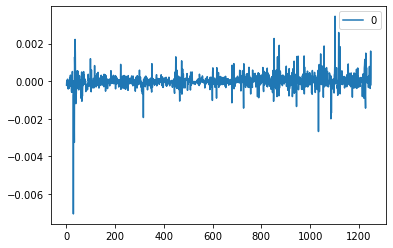

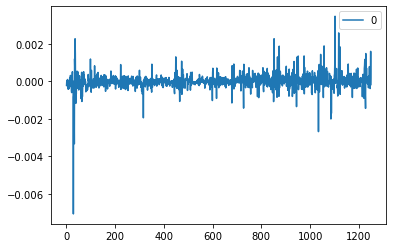

In [91]:
arima_residuals_1 = pd.DataFrame(arima_model_fit_1.resid)
arima_residuals_1.plot()
arima_residuals_2 = pd.DataFrame(arima_model_fit_2.resid)
arima_residuals_2.plot()
plt.show()


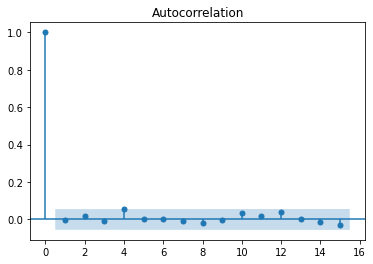

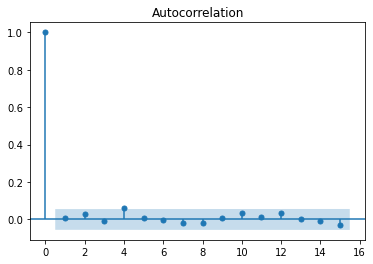

In [92]:
residual_acf_plot_1 = plot_acf(arima_residuals_1, lags=15)
residual_acf_plot_2 = plot_acf(arima_residuals_2, lags=15)

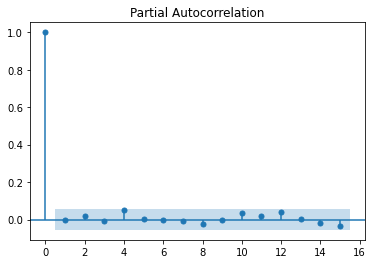

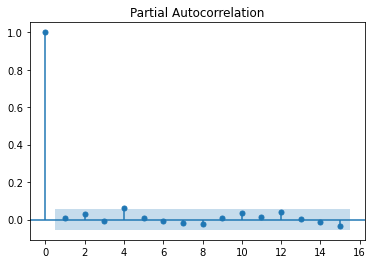

In [93]:
residual_pacf_plot_1 = plot_pacf(arima_residuals_1, lags=15)
residual_pacf_plot_2 = plot_pacf(arima_residuals_2, lags=15)

In [94]:
print('AIC for ARIMA(3,1,2): %s'%(arima_model_fit_1.aic))
print('AIC for ARIMA(2,1,3): %s'%(arima_model_fit_2.aic))

AIC for ARIMA(3,1,2): -15676.53208916025
AIC for ARIMA(2,1,3): -15674.93408606686


These AIC values are very close, but the AIC for ARIMA(3,1,2) is ever so slightly smaller, and therefore that is the slightly better model.